In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.	Import the data and assign appropriate column names.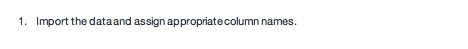

In [6]:
df=pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat',delim_whitespace=True,header=None)
#

In [7]:
df.columns=["City1","City2","Average_Fare_root","Distance","Average_weekly_passengers","market_leading_airline","market_share",
          "Average_fare_market","Low_price_airline","market_share","price"]

In [8]:
df.head()

,City1,City2,Average_Fare_root,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare_market,Low_price_airline,market_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# 2.	Drop the variables which has textual information (categorical variables)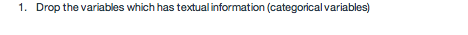

In [11]:
df1=df

In [12]:
df1.drop(columns=["City1","City2","market_leading_airline","Low_price_airline"],inplace=True)

In [13]:
df1.head()

,Average_Fare_root,Distance,Average_weekly_passengers,market_share,Average_fare_market,market_share,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


# 3.	Convert all the variable’s datatype to Integer 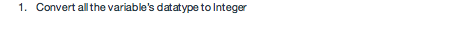

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Average_Fare_root            1000 non-null float64
Distance                     1000 non-null int64
Average_weekly_passengers    1000 non-null float64
market_share                 1000 non-null float64
Average_fare_market          1000 non-null float64
market_share                 1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


In [19]:
float_col=df1.select_dtypes(include=['float64'])
float_col.columns

Index([u'Average_Fare_root', u'Average_weekly_passengers', u'market_share',
       u'Average_fare_market', u'market_share', u'price'],
      dtype='object')

In [23]:
for col in float_col.columns.values:
    df1[col]=df1[col].astype('int64')

In [25]:
df1.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Average_Fare_root            1000 non-null int64
Distance                     1000 non-null int64
Average_weekly_passengers    1000 non-null int64
market_share                 1000 non-null int64
Average_fare_market          1000 non-null int64
market_share                 1000 non-null int64
price                        1000 non-null int64
dtypes: int64(7)
memory usage: 54.8 KB


# 4.	Remove all the outliers from the data using IQR method (Retain data points within 1.5 * IQR) 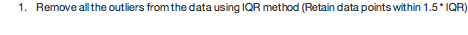

In [26]:
df1.describe()

,Average_Fare_root,Distance,Average_weekly_passengers,market_share,Average_fare_market,market_share,price
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,162.871000,1056.973000,671.804000,59.63000,166.150000,34.059000,142.711000
std,55.373157,643.203251,766.516661,19.35163,62.666136,27.084037,47.241584
min,50.000000,108.000000,181.000000,17.00000,50.000000,1.000000,49.000000
25%,125.000000,553.500000,256.750000,46.00000,124.000000,13.000000,113.000000
50%,161.000000,919.000000,404.000000,59.00000,161.000000,26.000000,137.000000
75%,197.000000,1452.500000,769.250000,73.00000,202.250000,52.000000,168.000000
max,401.000000,2724.000000,8950.000000,100.00000,490.000000,100.000000,387.000000


In [27]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
IQR

Average_Fare_root             72.00
Distance                     899.00
Average_weekly_passengers    512.50
market_share                  27.00
Average_fare_market           78.25
market_share                  39.00
price                         55.00
dtype: float64

In [29]:
upper_limit=Q3+1.5*IQR
lowwer_limit=Q1-1.5*IQR
lowwer_limit

Average_Fare_root             17.000
Distance                    -795.000
Average_weekly_passengers   -512.000
market_share                   5.500
Average_fare_market            6.625
market_share                 -45.500
price                         30.500
dtype: float64

In [30]:
df2=df1[~((df1<lowwer_limit) | (df1>upper_limit)).any(axis=1)]

In [32]:
df2.describe()

,Average_Fare_root,Distance,Average_weekly_passengers,market_share,Average_fare_market,market_share,price
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,159.787571,1039.383051,498.654237,60.134463,162.084746,33.876836,139.943503
std,48.461699,615.224361,327.553060,19.347530,53.278028,27.167854,39.853822
min,50.000000,108.000000,181.000000,17.000000,50.000000,1.000000,50.000000
25%,126.000000,564.000000,249.000000,47.000000,125.000000,13.000000,115.000000
50%,160.000000,914.000000,372.000000,59.000000,160.000000,26.000000,138.000000
75%,194.000000,1381.000000,644.000000,74.000000,198.000000,52.000000,166.000000
max,288.000000,2724.000000,1519.000000,100.000000,315.000000,100.000000,250.000000


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 999
Data columns (total 7 columns):
Average_Fare_root            885 non-null int64
Distance                     885 non-null int64
Average_weekly_passengers    885 non-null int64
market_share                 885 non-null int64
Average_fare_market          885 non-null int64
market_share                 885 non-null int64
price                        885 non-null int64
dtypes: int64(7)
memory usage: 55.3 KB


# 5.	Print the correlation matrix. 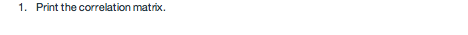

In [33]:
df2.corr()

,Average_Fare_root,Distance,Average_weekly_passengers,market_share,Average_fare_market,market_share,price
Average_Fare_root,1.000000,0.522609,-0.197014,-0.207874,0.979620,-0.494021,0.840969
Distance,0.522609,1.000000,-0.129640,-0.547132,0.489541,-0.361448,0.539772
Average_weekly_passengers,-0.197014,-0.129640,1.000000,0.022685,-0.163634,0.076881,-0.208752
market_share,-0.207874,-0.547132,0.022685,1.000000,-0.193264,0.280838,-0.314804
Average_fare_market,0.979620,0.489541,-0.163634,-0.193264,1.000000,-0.519736,0.794175
market_share,-0.494021,-0.361448,0.076881,0.280838,-0.519736,1.000000,-0.261183
price,0.840969,0.539772,-0.208752,-0.314804,0.794175,-0.261183,1.000000


# 6.	Treat “Average Fare” –  as your Dependent Variable and the variable which has the highest correlation with Average Fare as the Independent Variable. Drop all the other variables 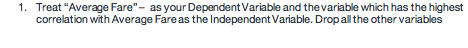

In [36]:
df2.drop(columns=['Average_weekly_passengers','market_share'],inplace=True)
df2.head()

/opt/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Average_Fare_root,Distance,Average_fare_market,price
0,114,528,111,111
1,122,860,123,118
2,214,852,223,167
3,69,288,68,68
4,158,723,161,145


# 7.	Create Scatter Plot of Independent Variable Vs Dependent Variable.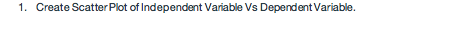# 

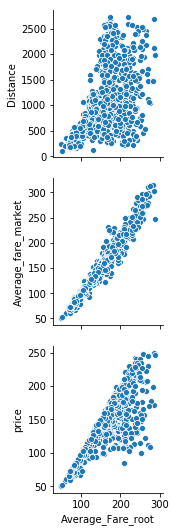

In [40]:
sns.pairplot(data=df2,x_vars=['Average_Fare_root'],y_vars=['Distance','Average_fare_market','price'])
plt.show()

# 8.	Divide the data set into training and test data set and build a Linear Regression model. 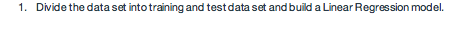

In [41]:
X=df2.drop(columns=['Average_Fare_root'])
Y=df2['Average_Fare_root']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split=train_test_split(X,Y,test_size=0.3,random_state=0)

# 9.	Print the train and test accuracy of the model .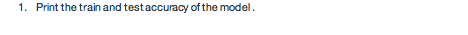

In [44]:
from sklearn.linear_model import LinearRegression


In [45]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
y_pred=regressor.predict(X_train)
print("R^2",regressor.score(X_train,Y_train))

('R^2', 0.9703785827286605)


In [51]:
print("R^2",regressor.score(X_test,Y_test))

('R^2', 0.9717471554453592)


# 10.	Print the coefficient and the intercept of the model .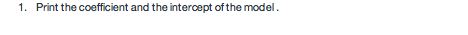# 

In [48]:
regressor.coef_

array([0.00175626, 0.76767473, 0.1962988 ])

In [49]:
regressor.intercept_

5.913722951550824